In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns', 100)
sns.set(color_codes=True)

In [2]:
train = pd.read_csv('data/ml_case_training_data.csv')
prices = pd.read_csv('data/ml_case_training_hist_data.csv')
churn = pd.read_csv('data/ml_case_training_output.csv')

In [3]:
train.head(3)

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,NaN,2015-06-23,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,2009-08-21,2015-08-31,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800


Some observations:

- There are a lot of NaN values in the customer data
- There are numerical and categorical variables in the data.
- There are few negative values in the data.

In [4]:
prices.head(3)

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


Some observations:

- The prices data contains a lot of zero values
- It contains both numerical and categorical variables

In [5]:
churn.head()

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0
3,764c75f661154dac3a6c254cd082ea7d,0
4,bba03439a292a1e166f80264c16191cb,0


### Customer data

In [6]:
train.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,15970.000000,16096.000000,15970.000000,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,0.991547,70.309945,0.135901,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,5.160969,79.023251,0.026252,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,0.000000,19.440000,0.142881,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,0.000000,131.470000,0.146348,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   activity_new              6551 non-null   object 
 2   campaign_disc_ele         0 non-null      float64
 3   channel_sales             11878 non-null  object 
 4   cons_12m                  16096 non-null  int64  
 5   cons_gas_12m              16096 non-null  int64  
 6   cons_last_month           16096 non-null  int64  
 7   date_activ                16096 non-null  object 
 8   date_end                  16094 non-null  object 
 9   date_first_activ          3508 non-null   object 
 10  date_modif_prod           15939 non-null  object 
 11  date_renewal              16056 non-null  object 
 12  forecast_base_bill_ele    3508 non-null   float64
 13  forecast_base_bill_year   3508 non-null   float64
 14  foreca

- `campaign_disc_ele` is empty. 
- The date columns are in the wrong datatypes. Parse them to `datetime64[ns]`.
- Some columns have a lot of missing values. Remove columns with more than 70%.
- Dataset is highly skewed. 
- Some columns have negative minimum values, which is highly unlikely since it would mean the client companies are producing energy and therefore energy should be "returned". 

In [8]:
(train.isna().sum() / train.shape[0]) * 100

id                            0.000000
activity_new                 59.300447
campaign_disc_ele           100.000000
channel_sales                26.205268
cons_12m                      0.000000
cons_gas_12m                  0.000000
cons_last_month               0.000000
date_activ                    0.000000
date_end                      0.012425
date_first_activ             78.205765
date_modif_prod               0.975398
date_renewal                  0.248509
forecast_base_bill_ele       78.205765
forecast_base_bill_year      78.205765
forecast_bill_12m            78.205765
forecast_cons                78.205765
forecast_cons_12m             0.000000
forecast_cons_year            0.000000
forecast_discount_energy      0.782803
forecast_meter_rent_12m       0.000000
forecast_price_energy_p1      0.782803
forecast_price_energy_p2      0.782803
forecast_price_pow_p1         0.782803
has_gas                       0.000000
imp_cons                      0.000000
margin_gross_pow_ele     

In [9]:
drop_cols = ['campaign_disc_ele', 'date_first_activ', 'forecast_base_bill_ele', 'forecast_base_bill_year', 'forecast_bill_12m', 'forecast_cons']

In [10]:
train = train.drop(drop_cols, axis='columns')

In [11]:
date_cols = [col for col in train if col.startswith('date')]

for col in date_cols:
    train[col] = pd.to_datetime(train[col])

The customer data still has missing values

- Impute numeric data with median
- Impute categorical data with 'NONE'
- Impute dates with most frequent date

In [12]:
num_cols = [train.select_dtypes(include=np.number).columns]

for col in num_cols:
    train[col] = train[col].fillna(train[col].median())

In [13]:
cat_cols = [col for col in list(train.select_dtypes(include='object').columns) if train[col].isna().sum() > 0]

for col in cat_cols:
    train[col] = train[col].fillna('NONE')

In [14]:
for col in date_cols:
    train[col] = train[col].fillna(train[col].value_counts().index[0])

In [15]:
train = pd.merge(train, churn, on='id')

#### Churn

In [16]:
(train.churn.value_counts() / train.shape[0]) * 100

0    90.090706
1     9.909294
Name: churn, dtype: float64

<AxesSubplot:xlabel='churn', ylabel='count'>

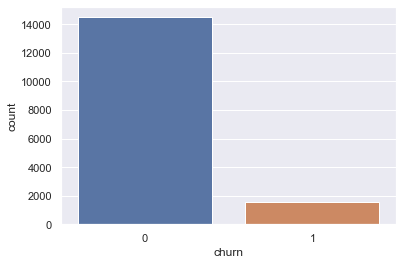

In [17]:
sns.countplot(x='churn', data=train)

About 10% of the total customers have churned.

#### Antiquity of clients (in number of years)

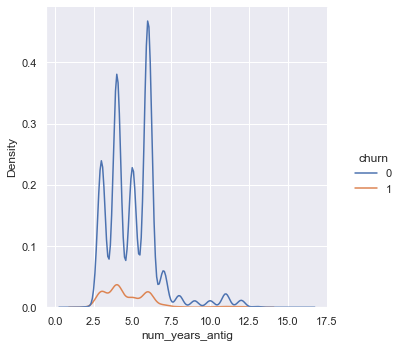

In [18]:
sns.displot(data=train, hue='churn', x='num_years_antig', kind='kde')

Churn is low with clients that joined recently. Customers who have been subscribed for 3 to 4 years churned the most.

In [19]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(kind="bar",
                        stacked=True,
                        figsize=size_,
                        rot=rot_,
                        title=title_)
    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()
def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """
    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(value,
                    ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
                    color=colour,
                    size=textsize,
                   )

In [20]:
channel = train[['id', 'channel_sales', 'churn']]

In [21]:
channel = channel.groupby([channel["channel_sales"],
                           channel["churn"]])["id"].count().unstack(level=1).fillna(0)

In [22]:
channel_churn = (channel.div(channel.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

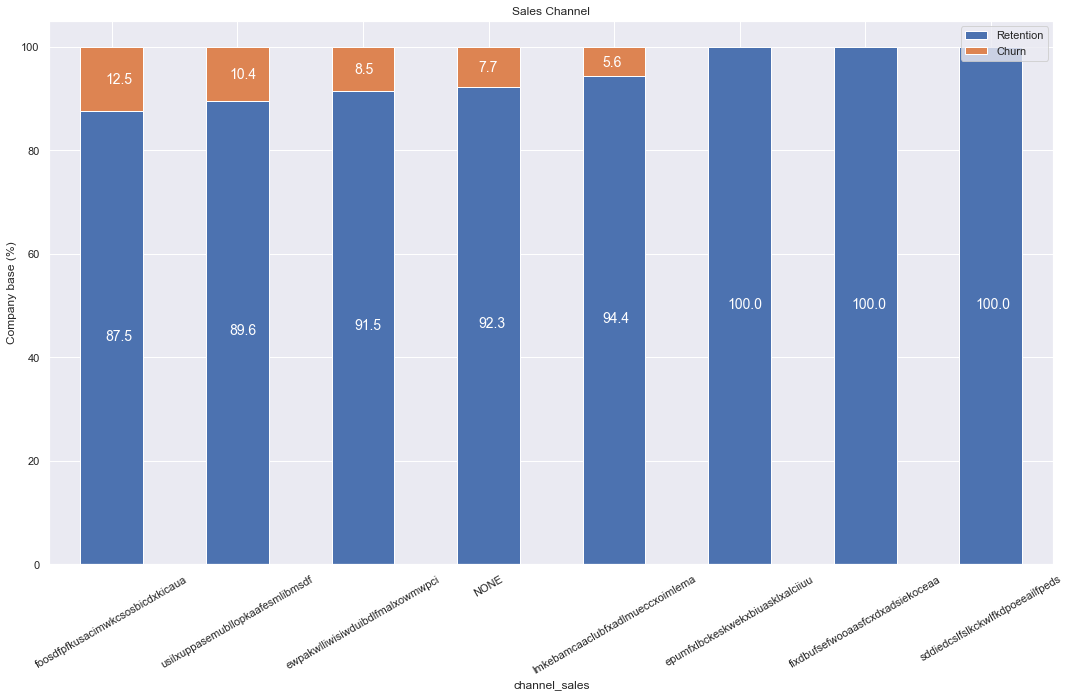

In [23]:
plot_stacked_bars(channel_churn, "Sales Channel", rot_=30)

In [24]:
train.groupby(['channel_sales','churn']).count()[['id']].rename(columns = {"id": "count"})

count
channel_sales                    churn       
NONE                             0       3893
                                 1        325
epumfxlbckeskwekxbiuasklxalciiuu 0          4
ewpakwlliwisiwduibdlfmalxowmwpci 0        884
                                 1         82
fixdbufsefwooaasfcxdxadsiekoceaa 0          2
foosdfpfkusacimwkcsosbicdxkicaua 0       6455
                                 1        922
lmkebamcaaclubfxadlmueccxoimlema 0       1957
                                 1        116
sddiedcslfslkckwlfkdpoeeailfpeds 0         12
usilxuppasemubllopkaafesmlibmsdf 0       1294
                                 1        150

Customer subscribed to 'foosdfpfkusacimwkcsosbicdxkicaua' have a relatively high churn, while 'lmkebamcaaclubfxadlmueccxoimlema' have relatively low churn.

### Price Data

In [25]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            193002 non-null  object 
 1   price_date    193002 non-null  object 
 2   price_p1_var  191643 non-null  float64
 3   price_p2_var  191643 non-null  float64
 4   price_p3_var  191643 non-null  float64
 5   price_p1_fix  191643 non-null  float64
 6   price_p2_fix  191643 non-null  float64
 7   price_p3_fix  191643 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [26]:
prices.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


- `price_date` is in the wrong datatype. Parse to datetime datatype.
- The price of power (`fix`) have negative minimum values.

In [27]:
prices['price_date'] = pd.to_datetime(prices['price_date'])

In [28]:
prices.dtypes

id                      object
price_date      datetime64[ns]
price_p1_var           float64
price_p2_var           float64
price_p3_var           float64
price_p1_fix           float64
price_p2_fix           float64
price_p3_fix           float64
dtype: object

In [29]:
prices = pd.merge(prices, churn)

<AxesSubplot:xlabel='price_date', ylabel='price_p3_fix'>

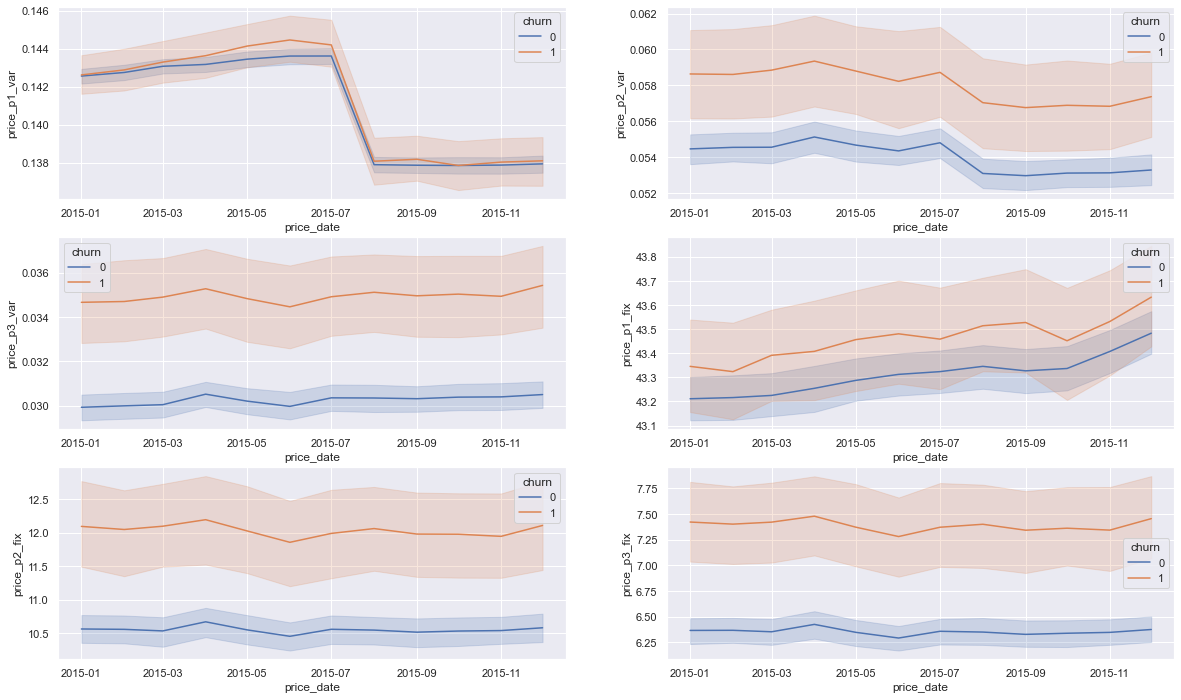

In [30]:
fig, ax = plt.subplots(3, 2, figsize=(20,12))
plt.subplot(3, 2, 1)
sns.lineplot(x='price_date', y='price_p1_var', data=prices, hue='churn')
plt.subplot(3, 2, 2)
sns.lineplot(x='price_date', y='price_p2_var', data=prices, hue='churn')
plt.subplot(3, 2, 3)
sns.lineplot(x='price_date', y='price_p3_var', data=prices, hue='churn')
plt.subplot(3, 2, 4)
sns.lineplot(x='price_date', y='price_p1_fix', data=prices, hue='churn')
plt.subplot(3, 2, 5)
sns.lineplot(x='price_date', y='price_p2_fix', data=prices, hue='churn')
plt.subplot(3, 2, 6)
sns.lineplot(x='price_date', y='price_p3_fix', data=prices, hue='churn')

- Clients who have churned generally paid higher prices in all of the seasons.
- The value of churn and non-churn in `price_p1_var` is almost similar. Drop that column.

In [31]:
prices[prices.id == '038af19179925da21a25619c5a24b745']

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0,0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0,0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0,0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0,0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0,0
5,038af19179925da21a25619c5a24b745,2015-06-01,0.149626,0.0,0.0,44.266930,0.0,0.0,0
6,038af19179925da21a25619c5a24b745,2015-07-01,0.150321,0.0,0.0,44.444710,0.0,0.0,0
7,038af19179925da21a25619c5a24b745,2015-08-01,0.145859,0.0,0.0,44.444710,0.0,0.0,0
8,038af19179925da21a25619c5a24b745,2015-09-01,0.145859,0.0,0.0,44.444710,0.0,0.0,0
9,038af19179925da21a25619c5a24b745,2015-10-01,0.145859,0.0,0.0,44.444710,0.0,0.0,0


- Since we have the consumption data for each of the companies for the year 2015, transform monthly pricing data to yearly, by taking the average.

In [32]:
prices.drop('price_p1_var', axis='columns', inplace=True)
prices = prices.groupby(['id'], as_index=False).mean()

In [33]:
df = pd.merge(train.loc[:, train.columns!='churn'], prices, on=['id'])

In [34]:
df

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.80,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0.092115,0.067241,58.956502,36.356887,8.337051,0
1,24011ae4ebbe3035111d65fa7c15bc57,NONE,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,0.102137,0.072579,40.640023,24.384011,16.256008,1
2,d29c2c54acc38ff3c0614d0a653813dd,NONE,NONE,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0.000000,0.000000,44.315416,0.000000,0.000000,0
3,764c75f661154dac3a6c254cd082ea7d,NONE,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0.088421,0.000000,44.385450,0.000000,0.000000,0
4,bba03439a292a1e166f80264c16191cb,NONE,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0.000000,0.000000,44.400265,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,18463073fb097fc0ac5d3e040f356987,NONE,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,0,0.0,18.57,0.138305,0.000000,44.311378,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0.000000,0.000000,44.370635,0.000000,0.000000,0
16092,d0a6f71671571ed83b2645d23af6de00,NONE,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,181,0.0,144.03,0.100167,0.091892,58.995952,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,0.095406,0.070817,59.015674,36.393379,8.345418,1
16093,10e6828ddd62cbcf687cb74928c4c2d2,NONE,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,179,0.0,129.60,0.116900,0.100015,40.606701,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,0.103794,0.073160,40.701732,24.421038,16.280694,1
16094,1cf20fd6206d7678d5bcafd28c53b4db,NONE,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,0,0.0,7.18,0.145711,0.000000,44.311378,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0.000000,0.000000,44.315416,0.000000,0.000000,0


In [35]:
df.duplicated().all()

False

In [44]:
df['tenure'] = ((train["date_end"]-train["date_activ"])/ np.timedelta64(1, "Y")).astype('int')

In [45]:
df['tenure']

0        3
1        3
2        7
3        6
4        6
        ..
16091    3
16092    4
16093    3
16094    4
16095    6
Name: tenure, Length: 16096, dtype: int64